In [1]:
# basic recommondation dataset

In [2]:
! unzip '/content/tmdb_5000_credits.csv.zip'

Archive:  /content/tmdb_5000_credits.csv.zip
  inflating: tmdb_5000_credits.csv   


In [3]:
!unzip '/content/tmdb_5000_movies.csv.zip'

Archive:  /content/tmdb_5000_movies.csv.zip
  inflating: tmdb_5000_movies.csv    


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
plt.style.use('fivethirtyeight')


In [10]:
df = pd.read_csv('/content/tmdb_5000_credits.csv')

In [11]:
df1 = pd.read_csv('/content/tmdb_5000_movies.csv')

In [13]:
df.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [14]:
df1.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [16]:
df_rename = df.rename(index = str,columns = {'movie_id':'id'})

In [17]:
#lets merge the two dataframes using the id column which you can find common in both the dataframes


In [19]:
df_merge = df_rename.merge(df1,on= 'id')

In [20]:
df_merge

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0

In [21]:
df_merge = df_merge.drop(columns = ['production_countries','spoken_languages','cast','crew','homepage','keywords','production_countries','status'])

In [23]:
df_merge.head(5)

,id,title_x,budget,genres,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,tagline,title_y,vote_average,vote_count
0,19995,Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
df_merge = df_merge.drop(columns = ['production_companies','original_title','overview','genres'])

In [25]:
df_merge.head(2)

,id,title_x,budget,original_language,popularity,release_date,revenue,runtime,tagline,title_y,vote_average,vote_count
0,19995,Avatar,237000000,en,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,en,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [26]:
#now lets sort the dataframe using the weightedavrage by creating new column


In [28]:
R = df_merge['vote_average']
v = df_merge['vote_count']
m = df_merge['vote_count'].quantile(0.70)
c = df_merge['vote_average'].mean()

In [39]:
df_merge['weightedavrage'] = ((R*v)+(c*m))/(v+m)

In [ ]:
df_merge.head(2)

In [43]:
df_merge = df_merge.sort_values('weightedavrage',ascending = False)
df_merge

,id,title_x,budget,original_language,popularity,release_date,revenue,runtime,tagline,title_y,vote_average,vote_count,weightedavrage
4307,49951,Certifiably Jonathan,1200000,en,0.047781,2007-03-01,0,85.0,NaN,Certifiably Jonathan,0.0,0,581.000000
4305,114065,Down & Out With The Dolls,0,en,0.002386,2003-03-20,0,88.0,Ain't Rock 'N' Roll a bitch.,Down & Out With The Dolls,0.0,0,581.000000
4729,272726,Dude Where's My Dog?,0,en,0.283970,2014-06-12,0,0.0,NaN,Dude Where's My Dog?,0.0,0,581.000000
3967,79587,Four Single Fathers,3,en,0.008263,2009-01-15,0,100.0,Comedy,Four Single Fathers,0.0,0,581.000000
4611,162396,The Big Swap,0,en,0.627763,1998-06-11,0,0.0,NaN,The Big Swap,0.0,0,581.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,47933,Independence Day: Resurgence,165000000,en,48.775723,2016-06-22,389681935,120.0,We had twenty years to prepare. So did they.,Independence Day: Resurgence,4.9,2491,6.305515
1154,216015,Fifty Shades of Grey,40000000,en,98.755657,2015-02-11,571006128,125.0,Are you curious?,Fifty Shades of Grey,5.2,3254,6.276004
337,47964,A Good Day to Die Hard,92000000,en,65.402595,2013-02-06,304654182,98.0,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,6.202509
9,209112,Batman v Superman: Dawn of Justice,250000000,en,155.790452,2016-03-23,873260194,151.0,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,6.199969


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


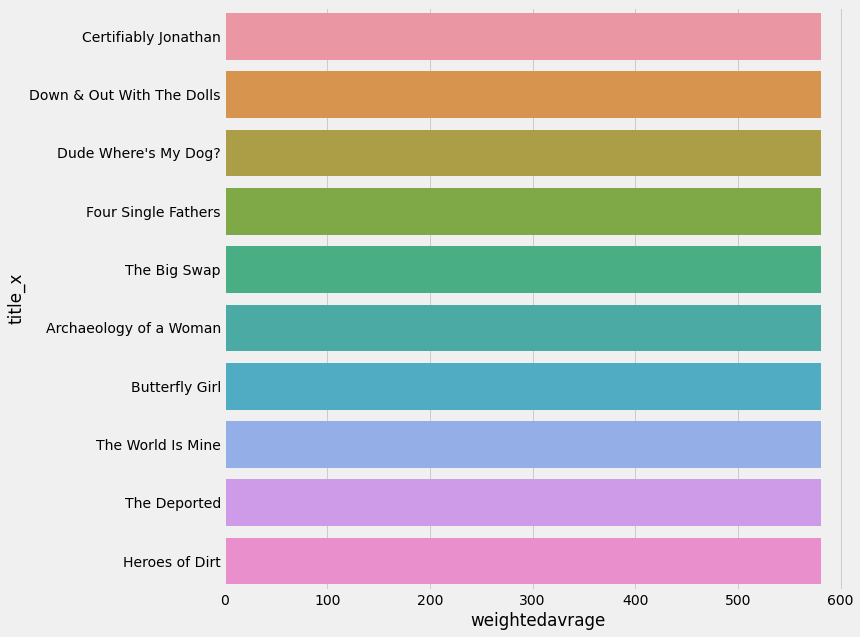

In [44]:
plt.figure(figsize = (10,10))
sns.barplot(df_merge['weightedavrage'].head(10),df_merge['title_x'].head(10))

In [45]:
# lets use the popularity also a factor to define the recommondation

In [46]:
# first of all we need to normalize both those column values so that we can have the both values in the same magnintude range that 0 to1

In [47]:
# for that  we can use one of the methods among min max normalization or the log transformaton

In [69]:
# for our case lets use the min max normalization
# we can also use the inbuit function in the sklearn module that the MinMaxScalar

In [51]:
min1 = np.min(df_merge['popularity'])
min2 = np.min(df_merge['weightedavrage'])
max1 = np.max(df_merge['popularity'])
max2 = np.max(df_merge['weightedavrage'])


In [53]:
df_merge['min_max_popularity'] = (df_merge['popularity']-min1)/(max1-min1)

In [54]:
df_merge['min_max_weightedavrage'] = (df_merge['weightedavrage']-min2)/(max2-min2)

In [ ]:
df_merge.head()

In [56]:
#now lets give importance to both the columns for recommonding the movies

In [57]:
# i would like to give 0.6 percentage fr the min_max_popularity and 0.4 for min_max_weightedavrage

In [58]:
# now lets create a new column and store the resulted values into them

In [59]:
df_merge['final'] = (df_merge['min_max_weightedavrage']*0.4) +(df_merge['min_max_popularity']*0.6)

In [ ]:
df_merge['final'].head(10)

In [ ]:
# lets sort the values according to the final column

In [61]:
df_merge = df_merge.sort_values('final',ascending = False)

In [62]:
df_merge.head(10)

,id,title_x,budget,original_language,popularity,release_date,revenue,runtime,tagline,title_y,vote_average,vote_count,weightedavrage,min_max,min_max_popularity,min_max_weightedavrage,final
546,211672,Minions,74000000,en,875.581305,2015-06-17,1156730962,91.0,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,7.164800,1.000000,1.000000,0.002133,0.600853
95,157336,Interstellar,165000000,en,724.247784,2014-11-05,675120017,169.0,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,8.420995,0.827162,0.827162,0.004318,0.498025
3855,370662,Time to Choose,3500000,en,1.618138,2015-09-04,0,100.0,Climate change for good.,Time to Choose,0.0,0,581.000000,0.001848,0.001848,1.000000,0.401109
4611,162396,The Big Swap,0,en,0.627763,1998-06-11,0,0.0,NaN,The Big Swap,0.0,0,581.000000,0.000717,0.000717,1.000000,0.400430
4269,218500,The Ballad of Gregorio Cortez,0,en,0.592821,1983-08-19,0,104.0,NaN,The Ballad of Gregorio Cortez,0.0,0,581.000000,0.000677,0.000677,1.000000,0.400406
4665,376010,Western Religion,0,en,0.589540,2015-10-09,0,106.0,"Your soul is at stake in Religion, Arizona.",Western Religion,0.0,0,581.000000,0.000673,0.000673,1.000000,0.400404
4486,302579,Naturally Native,700000,en,0.578798,1999-10-08,10508,107.0,"Sometimes When You're Going Home, It's Importa...",Naturally Native,0.0,0,581.000000,0.000661,0.000661,1.000000,0.400397
4266,280381,House at the End of the Drive,0,en,0.430490,2014-01-11,0,91.0,It's where they died.,House at the End of the Drive,0.0,0,581.000000,0.000492,0.000492,1.000000,0.400295
3669,113406,Should've Been Romeo,0,en,0.407030,2012-04-28,0,0.0,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,581.000000,0.000465,0.000465,1.000000,0.400279
4653,46252,Rust,0,en,0.399491,2010-10-07,0,94.0,NaN,Rust,0.0,0,581.000000,0.000456,0.000456,1.000000,0.400274


In [63]:
# the above data frame is the final dataframe for the recommondation
# lets visualize a plot using the final column

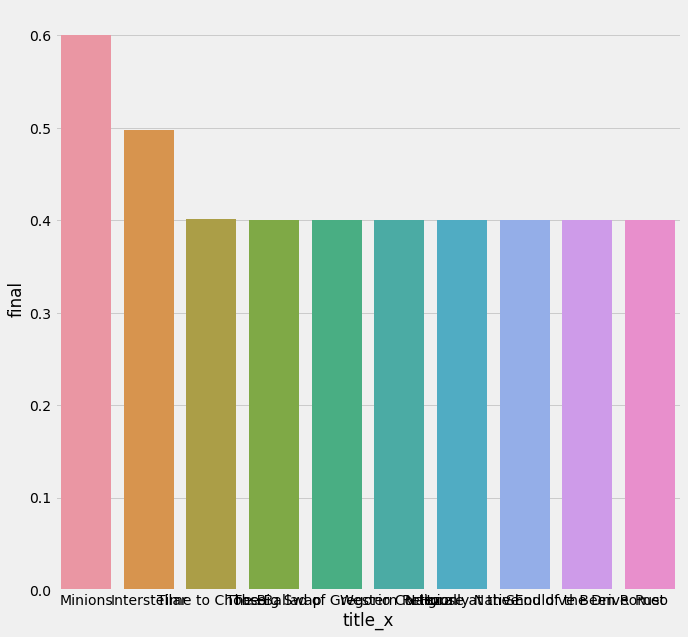

In [68]:
plt.figure(figsize =(10,10))
sns.barplot(x =df_merge['title_x'].head(10),y =df_merge['final'].head(10))